In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import random
import plotly.express as px

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from collections import Counter


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/nabee/Desktop/CIND 820/Shoppers Data Set.csv')

In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [5]:
# dfa = pd.concat([df,pd.get_dummies(df['Month'])],axis=1).drop(['Month'],axis=1)
# dfa.head(6)

## Attribute Information:

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository.
The data set shows each session that belong to a different user in a 1-year period.

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The **"Bounce Rate"**, **"Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Column Descriptions  <br>

**Administrative**: This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration** : This is the amount of time spent in this category of pages.

**Informational**           : This is the number of pages of this type (informational) that the user visited.

**Informational_Duration**  : This is the amount of time spent in this category of pages.

**ProductRelated**          : This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration** : This is the amount of time spent in this category of pages.

**BounceRates**             : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates**               : The percentage of pageviews on the website that end at that specific page.

**PageValues**              : The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
<br>[More information about how this value is calculated](https://support.google.com/analytics/answer/2695658?hl=en)

**SpecialDay**              : This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day)                             in  which the transaction is more likely to be finalized. 

**Month**                  : Contains the month the pageview occurred, in string form.

**OperatingSystems**       : An integer value representing the operating system that the user was on when viewing the page.

**Browser**                : An integer value representing the browser that the user was using to view the page.

**Region**                 : An integer value representing which region the user is located in.

**TrafficType**            : An integer value representing what type of traffic the user is categorized into.
<br>[Read more about traffic types here.](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)

**VisitorType**            : A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend**                : A boolean representing whether the session is on a weekend.<br>
**Revenue**                : A boolean representing whether or not the user completed the purchase.

The data is imbalances with only where only 15% of the sessions ended in a purchase , we will need to explore some balancing techniques


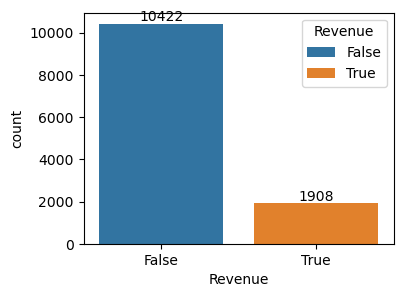

In [6]:
plt.figure(figsize=(4,3))
ax = sns.countplot(df, x= "Revenue", hue="Revenue" ,
                order=df['Revenue'].value_counts(ascending=False).index)
for i in ax.containers:
     ax.bar_label(i,)
print("The data is imbalances with only where only 15% of the sessions ended in a purchase , we will need to explore some balancing techniques")

# Data Set Balancing Methods

In [7]:
df = df.drop(['Month','VisitorType'], axis=1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False


In [8]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [10]:
# print(X_train)

In [11]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [12]:
col_names = ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated'
    ,'ProductRelated_Duration'	,'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay'
             ,'OperatingSystems','Browser',	'Region'	,'TrafficType']
# X_train = X_train[col_names]
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [14]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=50, max_depth=6, random_state=13))

In [15]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=13))])

In [16]:
y_pred = SMOTETomek_rf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)
print(cm)

[[  33 3094]
 [   1  571]]


In [18]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]
SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.998252,0.155798,0.26953,0.163287


In [19]:
RANDOM_SEED = 97

INPUT_DATASET = 'C:/Users/nabee/Desktop/CIND 820/Shoppers Data Set.csv'
OUTPUT_DATASET = "C:/Users/nabee/Desktop/CIND 820/B_Shoppers Data Set.csv"
BALANCE_COL = "Revenue"
VALUES = [True, False]
# # set the random seed for reproducibility
random.seed(97)
# # load the dataset
dataset = pd.read_csv(INPUT_DATASET)
# # figure out the minimum number of the values
value_counts = []
for value in VALUES:
    value_counts.append(dataset[dataset[BALANCE_COL] == value].shape[0])
min_num_rows = min(value_counts)
for index, value in enumerate(VALUES):
    print(f"There were {value_counts[index]} {value}s in the dataset - the kept amount is {min_num_rows}.")
# randomly select the minumum number of rows each of the values
chosen_ids = []
for label in VALUES:
    ids = dataset[dataset[BALANCE_COL] == label].index
    chosen_ids.extend(random.sample(list(ids), min_num_rows))

# remove the non-chosen ids from the dataset
dataset = dataset.drop(dataset.index[list(set(range(dataset.shape[0])) - set(chosen_ids))])

# save the dataset
dataset.to_csv(OUTPUT_DATASET, index=False)
dfb = pd.read_csv(OUTPUT_DATASET)

There were 1908 Trues in the dataset - the kept amount is 1908.
There were 10422 Falses in the dataset - the kept amount is 1908.


In [20]:
dfw = (dfb.loc[(dfb.Revenue == True)])
print("Weekend is also imbalanced , if we also removed random rows , we would be left with even fewer rows of data, should i still try and balance it ?")
dfw['Weekend'].value_counts()

Weekend is also imbalanced , if we also removed random rows , we would be left with even fewer rows of data, should i still try and balance it ?


Weekend
False    1409
True      499
Name: count, dtype: int64

### All Exploratory Data Analysis has been performed on the Balance Data Set.

# Bivariate Analysis

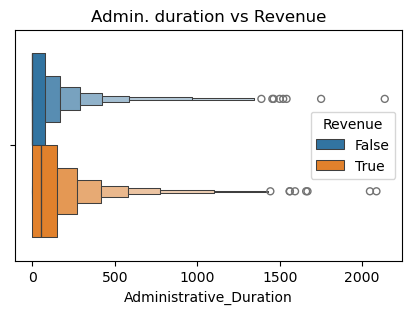

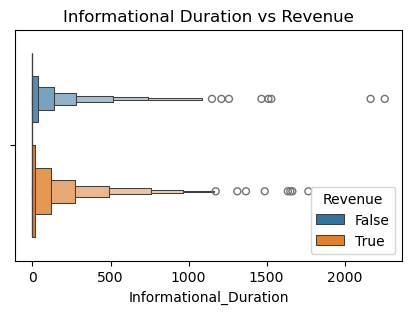

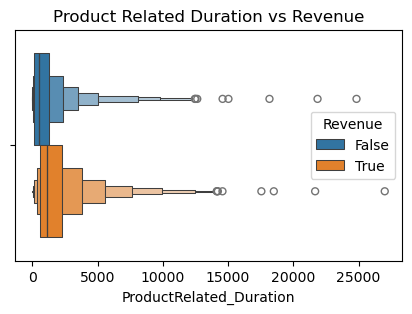

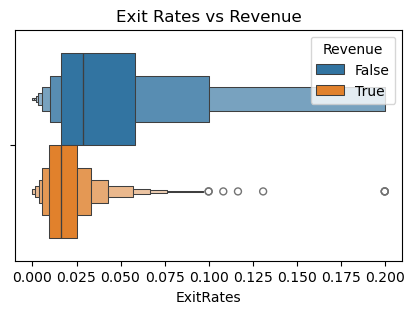

In [21]:
plt.rcParams['figure.figsize'] = (5, 3)

sns.boxenplot(dfb, x = "Administrative_Duration", hue = "Revenue")
plt.title('Admin. duration vs Revenue', fontsize = 12)
# plt.xlabel('Admin. duration', fontsize = 8)
# plt.ylabel('Revenue', fontsize = 8)
plt.show()

sns.boxenplot(dfb, x = "Informational_Duration", hue = "Revenue")
plt.title('Informational Duration vs Revenue', fontsize = 12)
plt.show()


sns.boxenplot(dfb, x = "ProductRelated_Duration", hue = "Revenue")
plt.title('Product Related Duration vs Revenue', fontsize = 12)
plt.show()


sns.boxenplot(dfb, x = "ExitRates", hue = "Revenue")
plt.title('Exit Rates vs Revenue', fontsize = 12)
plt.show()

We see that Admin Duration, Product Related Duration are exponentially distributed and have outliers for both TRUE and FALSE.

Exit Rate is normally distributed but has outliers for records where purchase made was True. 

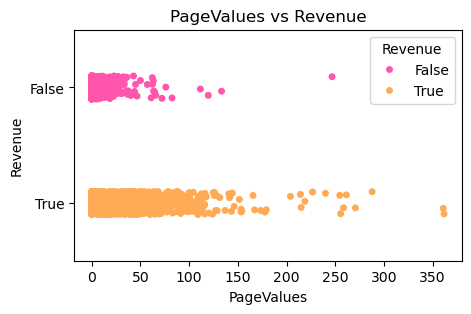

Page Values is also exponentially distributed and has outliers , but is also influential on the Revenue Column and is a significant feature


In [22]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.stripplot(dfb, x = "PageValues", y = "Revenue", hue = "Revenue", palette = 'spring', orient = 'h')
plt.title('PageValues vs Revenue', fontsize = 12)
plt.show()
print("Page Values is also exponentially distributed and has outliers , but is also influential on the Revenue Column and is a significant feature")

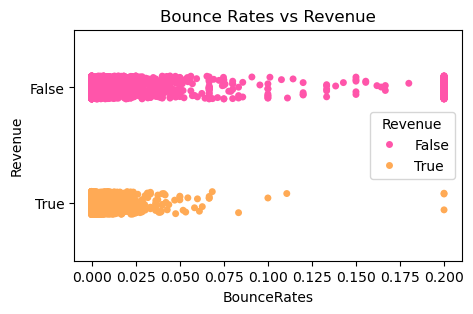

In [23]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.stripplot(dfb, x = "BounceRates", y = "Revenue", hue = "Revenue", palette = 'spring', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 12)
plt.show()

# Outliers

In [24]:
# identify outliers with standard deviation
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(dfb[i]), std(dfb[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # print(i, ': \n')

    # identify outliers
    outliers = [x for x in dfb[i] if x < lower or x > upper]
    num_out = len(outliers)
    # print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in dfb[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    # print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    # print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

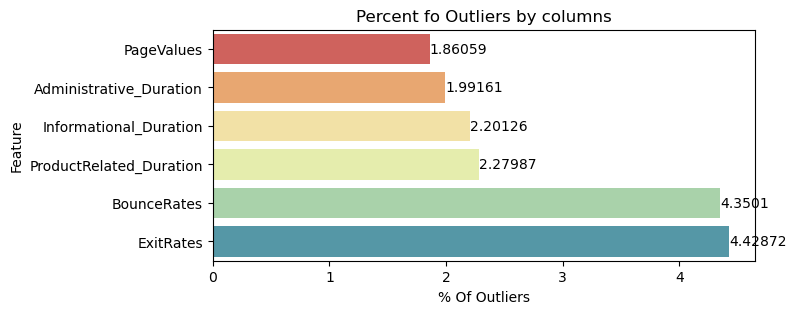

In [25]:
# GnBu_d
sns.color_palette("Spectral", as_cmap=True)
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = True)
plt.rcParams['figure.figsize'] = (7, 3)
ax = sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'],palette = 'Spectral') 
plt.title('Percent fo Outliers by columns')
for i in ax.containers:
     ax.bar_label(i,)
plt.show()

# Statistical Test 

1. **Categorical column vs Target column** <br>
    Checking with Revenue is influenced by categorical columns. NULL Hypothesis ,H0 = proportion of Revenue across categroies is same and Alternate Hypothesis H1 = proportion of revenue across categories is not same and is different in at least two categories3. Numerical column vsTtarget column

In [26]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(dfb[n], dfb['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('Yes') # significant
    else:
        # Accept Null Hypothesis
        ss.append('No') # not significant
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,Yes
1,Informational,0.0000,Yes
2,ProductRelated,0.0000,Yes
3,Month,0.0000,Yes
4,OperatingSystems,0.0000,Yes
5,Browser,0.0043,Yes
6,Region,0.1806,No
7,TrafficType,0.0000,Yes
8,VisitorType,0.0000,Yes
9,Weekend,0.0028,Yes


In [27]:
from scipy.stats import levene
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']
# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = dfb[n][dfb['Revenue'] == False]
    g2 = dfb[n][dfb['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('Yes')  # significant
    else:
        ts.append('No') # not significant
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,Yes
1,Informational_Duration,0.0,Yes
2,ProductRelated_Duration,0.0,Yes
3,BounceRates,0.0,Yes
4,ExitRates,0.0,Yes
5,PageValues,0.0,Yes


In [28]:
# dfnew = dfb.iloc[: , :10]
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# matrix = np.triu(dfnew.corr())
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(dfnew.corr(), ax=ax, annot=True,mask = matrix,cmap = cmap)
# plt.show()

# Clustering Analysis

**Understanding user characteristics in terms of time spent on the Website**
1. Administrative Duration vs Bounce Rate
2. Information Duration vs Bounce Rate
3. Administrative Duration vs Exit Rates


**Understanding where the users come from**

1. Region vs Traffic Type
2. Administrative Duration vs Region


**The Elbow method to find out the maximum number of clusters**

1. Compute cus Region

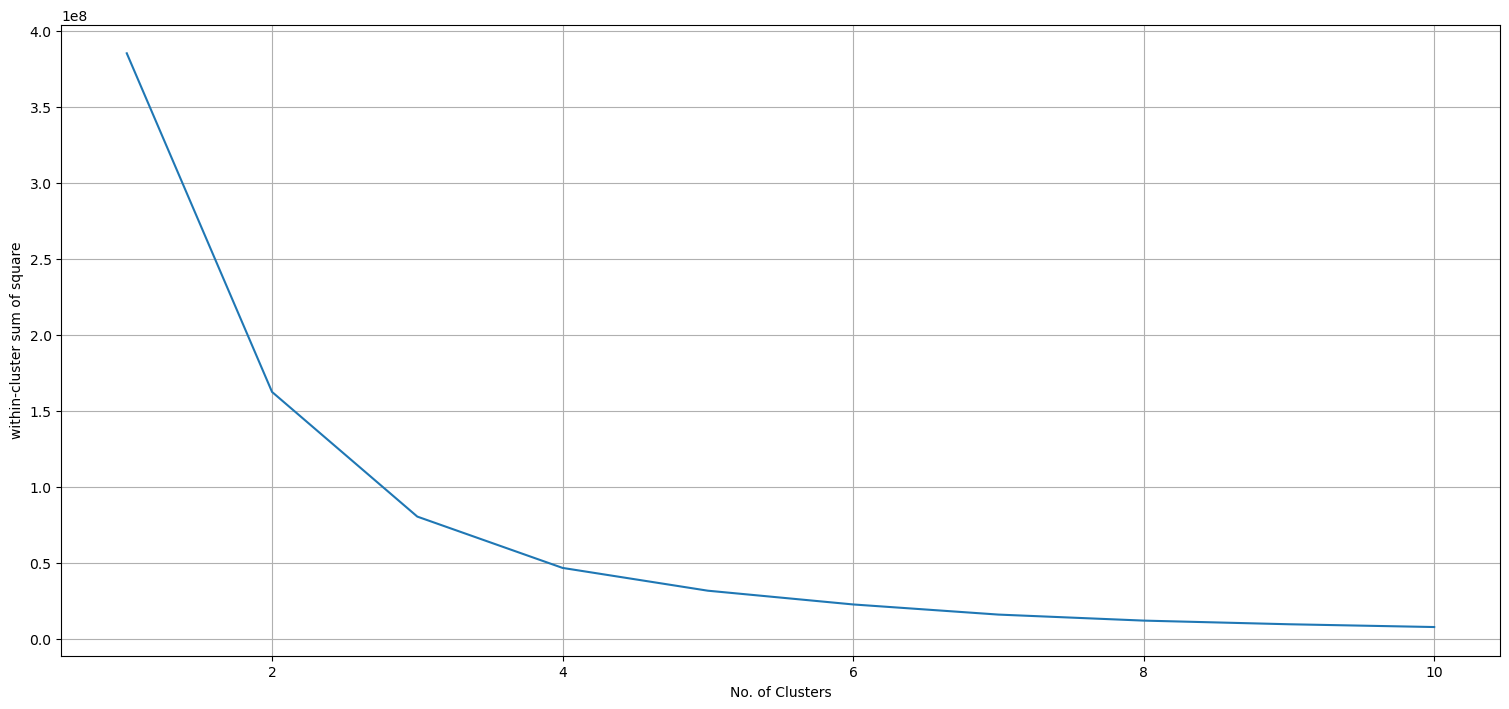

In [29]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.
# preparing the dataset
adbr = df.iloc[:, [1, 6]].values


# checking the shape of the dataset
# print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(adbr)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

### Visualizing the cluster using cluster plot

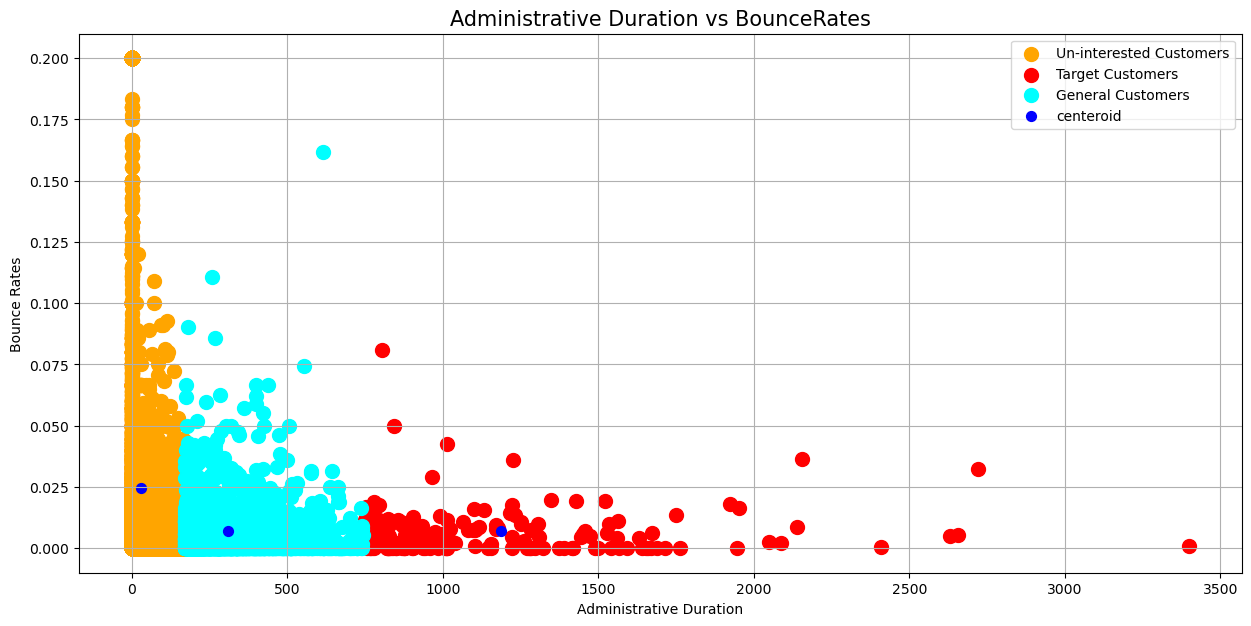

In [30]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(adbr)

plt.scatter(adbr[y_means == 0, 0], adbr[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(adbr[y_means == 1, 0], adbr[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(adbr[y_means == 2, 0], adbr[y_means == 2, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.rcParams['figure.figsize'] = (16, 6)
plt.title('Administrative Duration vs BounceRates', fontsize = 15)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

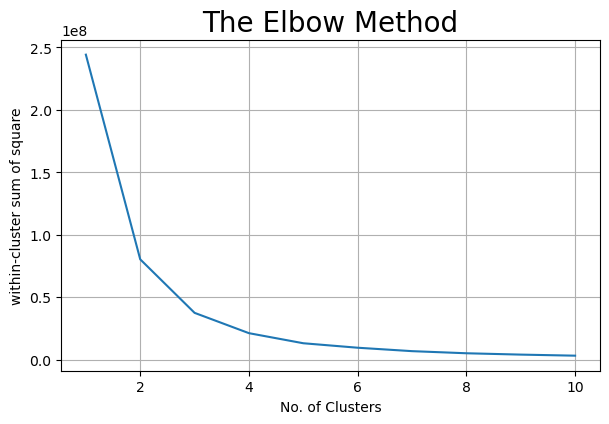

In [31]:
# cluster anaysis of Informational Duration vs Bounce Rates
idbr = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(idbr)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

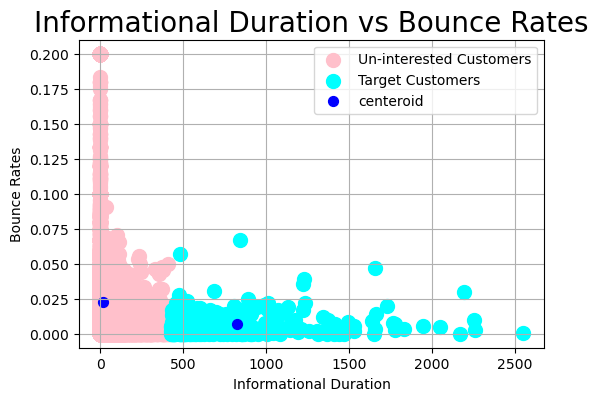

In [32]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(idbr)

plt.scatter(idbr[y_means == 0, 0], idbr[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(idbr[y_means == 1, 0], idbr[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.rcParams['figure.figsize'] = (30, 6)
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Administration Duration vs Exit Rates

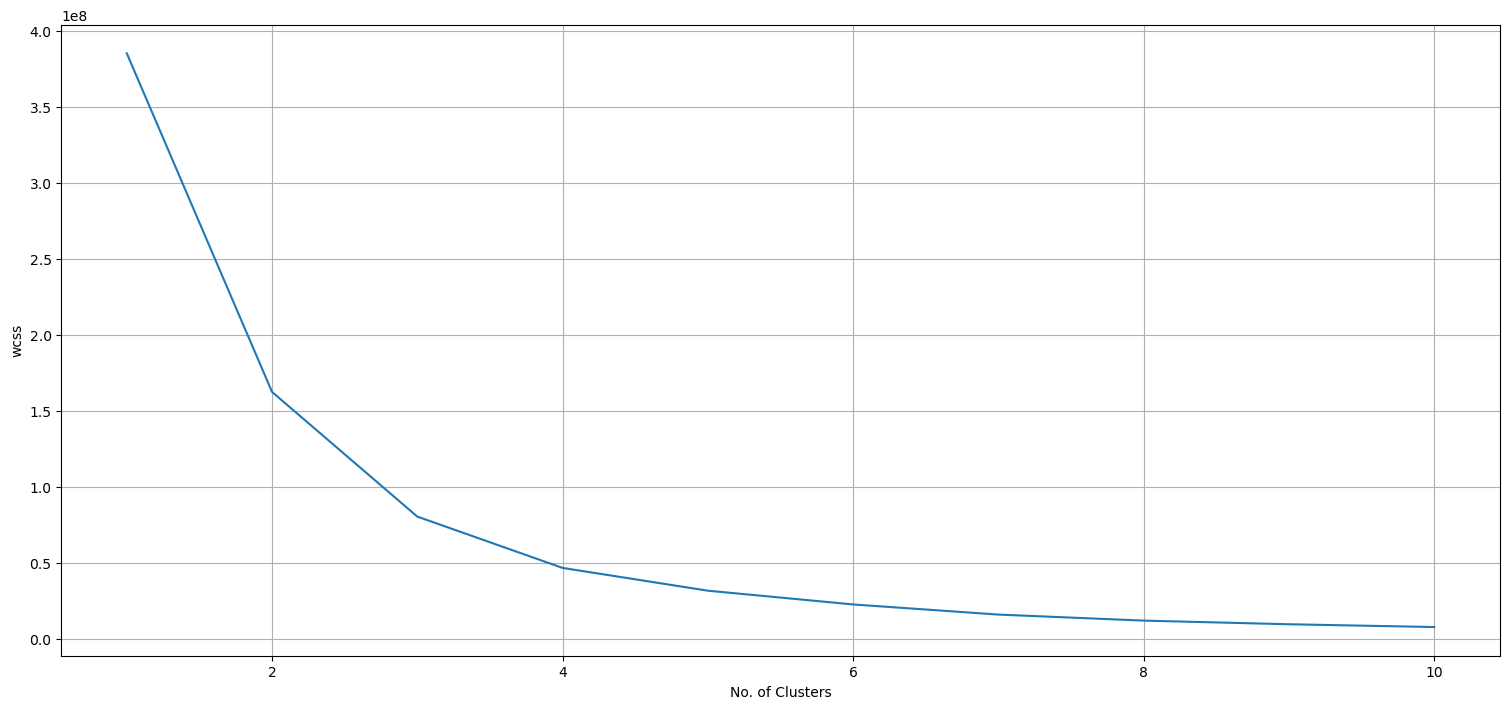

In [33]:

ader = df.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(ader)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

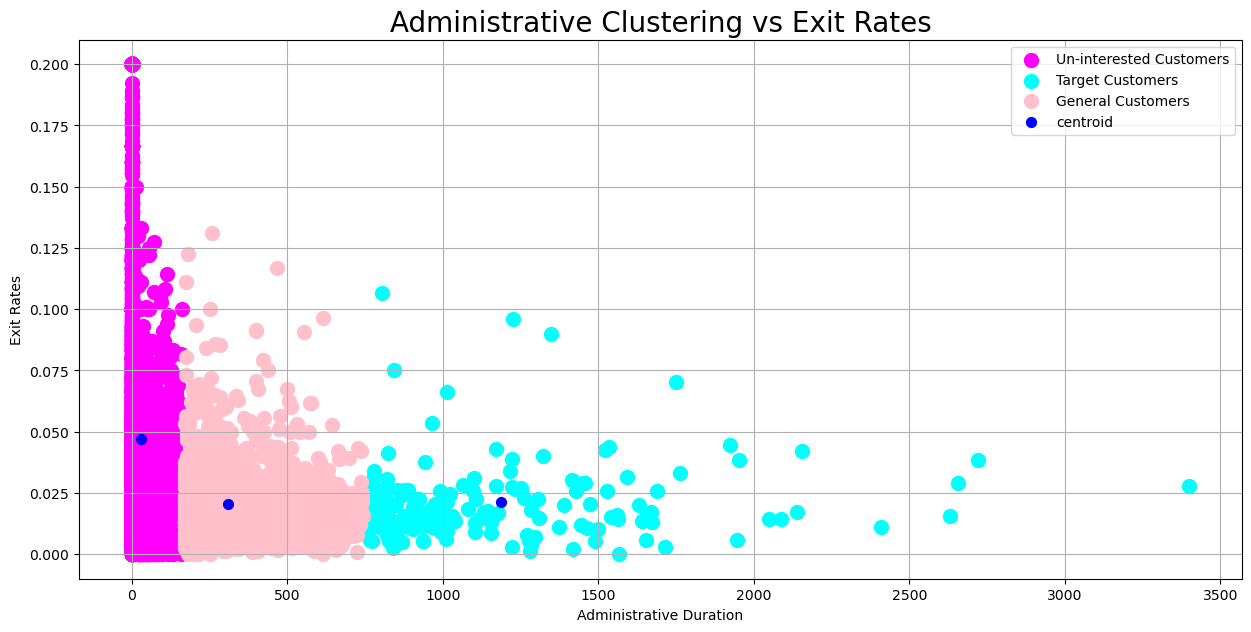

In [34]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(ader)

plt.scatter(ader[y_means == 0, 0], ader[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(ader[y_means == 1, 0], ader[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(ader[y_means == 2, 0], ader[y_means == 2, 1], s = 100, c = 'pink', label = 'General Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## One hot Encoding

In [35]:
df1 = pd.get_dummies(dfb)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,13,334.966667,0.000000,0.007692,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,4,64.6,0,0.0,32,1135.444444,0.002857,0.009524,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,2,35.000000,0.000000,0.100000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,3,78.000000,0.000000,0.066667,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,14,380.500000,0.014286,0.028571,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 3816 non-null   int64  
 1   Administrative_Duration        3816 non-null   float64
 2   Informational                  3816 non-null   int64  
 3   Informational_Duration         3816 non-null   float64
 4   ProductRelated                 3816 non-null   int64  
 5   ProductRelated_Duration        3816 non-null   float64
 6   BounceRates                    3816 non-null   float64
 7   ExitRates                      3816 non-null   float64
 8   PageValues                     3816 non-null   float64
 9   SpecialDay                     3816 non-null   float64
 10  OperatingSystems               3816 non-null   int64  
 11  Browser                        3816 non-null   int64  
 12  Region                         3816 non-null   i

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

Revenue
0    1908
1    1908
Name: count, dtype: int64

In [38]:
df1['Weekend'].value_counts()

Weekend
False    2898
True      918
Name: count, dtype: int64

In [39]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

Weekend
0    2898
1     918
Name: count, dtype: int64

In [40]:
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (3816, 28)
Shape of y:  (3816,)


In [41]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3052, 28)
Shape of y_train : (3052,)
Shape of x_test : (764, 28)
Shape of y_test : (764,)


In [42]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.6618610747051114
Testing Accuracy:  0.6740837696335078


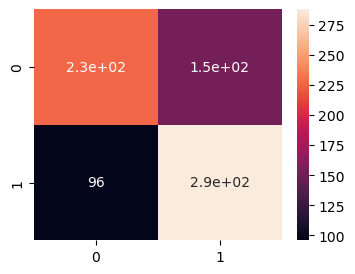

In [43]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (4, 3)
sns.heatmap(cm, annot = True)
plt.show()

In [44]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       380
           1       0.65      0.75      0.70       384

    accuracy                           0.67       764
   macro avg       0.68      0.67      0.67       764
weighted avg       0.68      0.67      0.67       764



In [45]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7283748361730014
Testing Accuracy:  0.7617801047120419


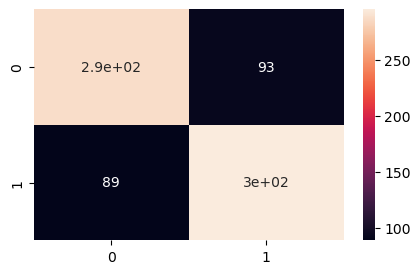

In [46]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cm, annot = True)
plt.show()

In [47]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       380
           1       0.76      0.77      0.76       384

    accuracy                           0.76       764
   macro avg       0.76      0.76      0.76       764
weighted avg       0.76      0.76      0.76       764



In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()
# logreg = LogisticRegression(random_state=16)

# fit the model with data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

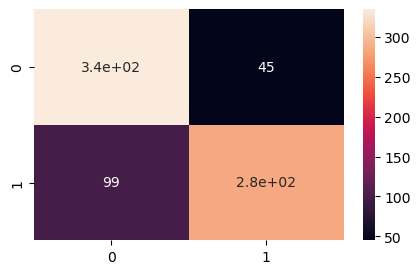

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cm, annot = True)
plt.show()

In [51]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       380
           1       0.86      0.74      0.80       384

    accuracy                           0.81       764
   macro avg       0.82      0.81      0.81       764
weighted avg       0.82      0.81      0.81       764

